In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# - CRIM - per capita crime rate by town 
# (**마을별 1인당 범죄율)**
# - ZN - proportion of residential land zoned for lots over 25,000 sq.ft. 
# (25,000평방피트 이상의 부지에 대해 구획된 주거용 토지의 비율.)
# - INDUS - proportion of non-retail business acres per town.
# - CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
# - NOX - nitric oxides concentration (parts per 10 million)
# - RM - average number of rooms per dwelling
# (**주거당 평균 객실 수)**
# - AGE - proportion of owner-occupied units built prior to 1940
# (**1940년 이전에 지어진 소유주 점유의 비율)**
# - DIS - weighted distances to five Boston employment centres
# (**보스턴 고용 센터 5곳까지의 가중 거리)**
# - RAD - index of accessibility to radial highways
# (**방사형 고속도로 접근성 지수)**
# - TAX - full-value property-tax rate per $10,000
# (**$10,000당 전액 재산세율)**
# - PTRATIO - pupil-teacher ratio by town
# - B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
# (마을별 흑인 비율입니다)
# - LSTAT - % lower status of the population
# - MEDV - Median value of owner-occupied homes in $1000's
# (**소유주가 거주하는 주택의 중간값 $1000$s)**

In [3]:
#데이터 불러오기기
df = pd.read_csv('D:\DT\Python_DL_study_project\Data\housingdata.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [4]:
#데이터 정보확인
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
#데이터 정보확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [6]:
#데이터 null 값확인
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [7]:
#데이터 결측치 형태확인인
df[df.isna( ).any(axis=1)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
6,0.08829,12.5,7.87,NaN,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
9,0.17004,12.5,7.87,NaN,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9
14,0.63796,0.0,8.14,NaN,0.538,6.096,84.5,4.4619,4,307,21.0,380.02,10.26,18.2
35,0.06417,0.0,5.96,0.0,0.499,5.933,68.2,3.3603,5,279,19.2,396.90,NaN,18.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,4.64689,0.0,18.10,0.0,0.614,6.980,67.6,2.5329,24,666,20.2,374.68,NaN,29.8
479,14.33370,0.0,18.10,NaN,0.614,6.229,88.0,1.9512,24,666,20.2,383.32,13.11,21.4
482,5.73116,0.0,18.10,NaN,0.532,7.061,77.0,3.4106,24,666,20.2,395.28,7.01,25.0
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4


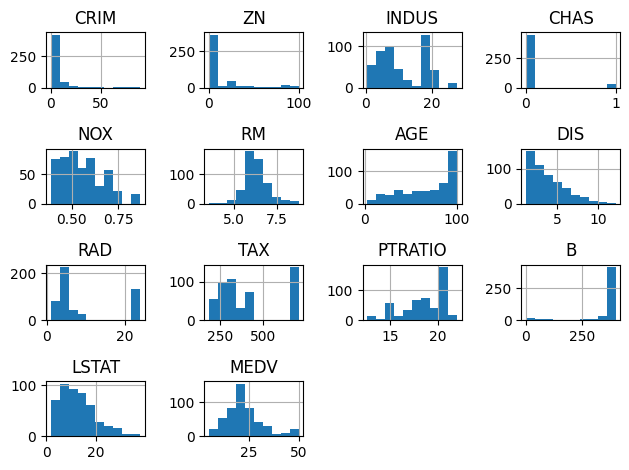

In [8]:
#데이터 분포확인
df.hist()
plt.tight_layout()
plt.show()

<Axes: >

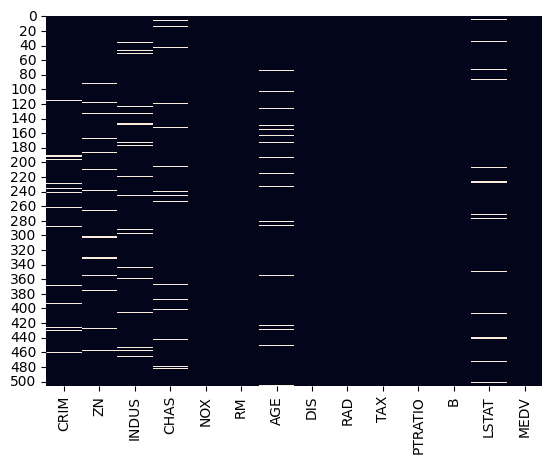

In [9]:
#결측치 히트맵
import seaborn as sns
sns.heatmap(df.isnull(), cbar =False)


In [10]:
#결측치대체를 위해 수치형 자료에 적합한 MICE 대치법 사용
#범주형 데이터도 같이처리리
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer_mice = IterativeImputer(random_state=42)
df_imputed = imputer_mice.fit_transform(df)

In [11]:
#데이터프레임 변환환
df_imputed = pd.DataFrame(df_imputed, index=df.index, columns=df.columns)
print(df_imputed)

        CRIM    ZN  INDUS  CHAS    NOX     RM        AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.200000  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.900000  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.100000  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.800000  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.200000  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...        ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.100000  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.700000  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.000000  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.300000  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  70.188956  2.5050  1.0  273.0   

     PTRATIO       B      LSTAT  MEDV  

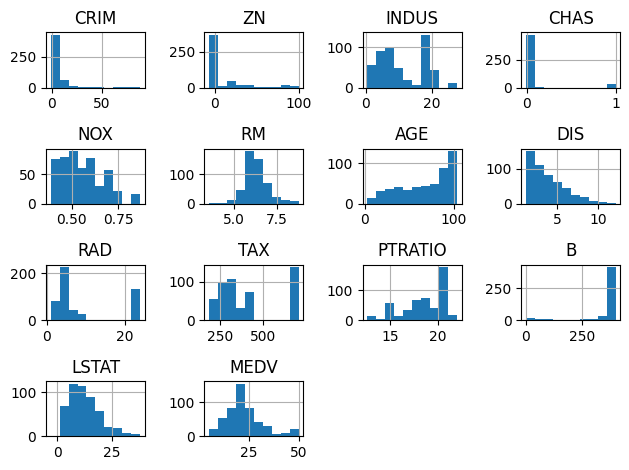

In [12]:
#데이터 분포확인
df_imputed.hist()
plt.tight_layout()
plt.show()

In [13]:
#결측값 확인
df_imputed.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [14]:
#타겟과 데이터 분리
X = df_imputed.drop(['MEDV'], axis=1)
y = df_imputed['MEDV']
print(X)
print(y)

        CRIM    ZN  INDUS  CHAS    NOX     RM        AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.200000  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.900000  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.100000  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.800000  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.200000  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...        ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.100000  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.700000  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.000000  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.300000  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  70.188956  2.5050  1.0  273.0   

     PTRATIO       B      LSTAT  
0    

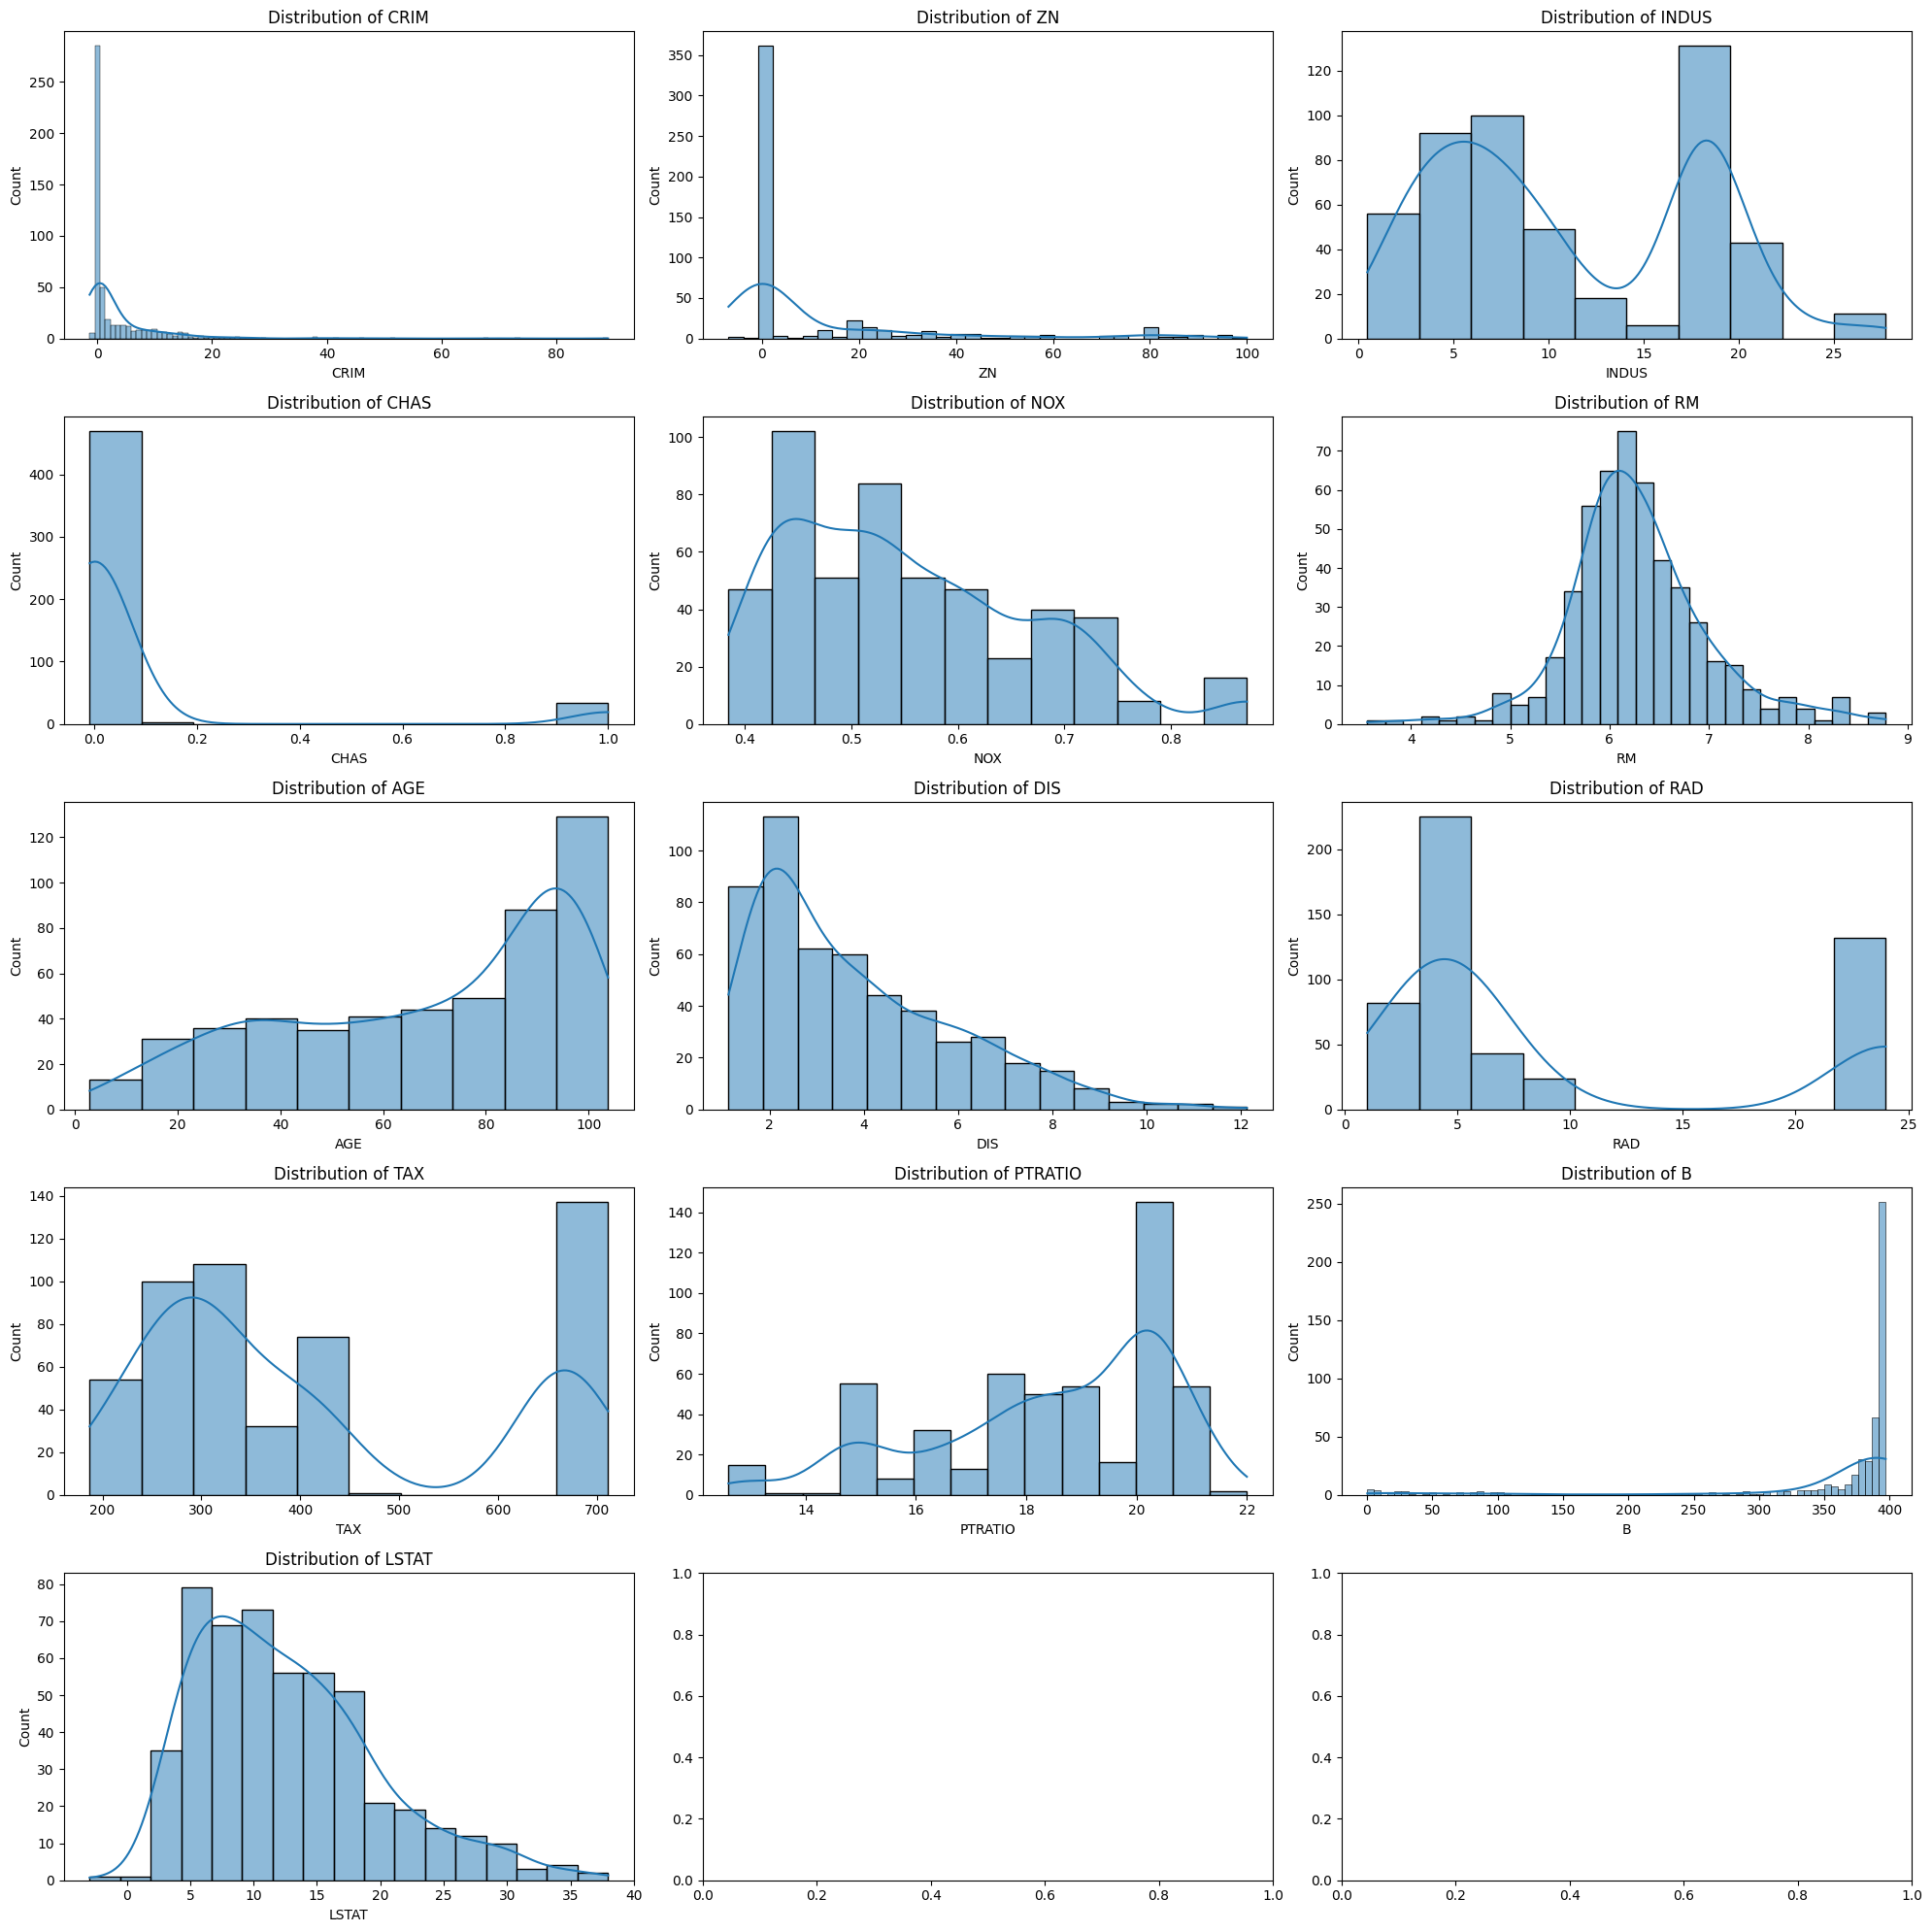

In [15]:
#정규분포형태로 변환하여 그래프의 왜도 경도 확인인
def plot_distribution(df, cols, n_cols=3):
    n_rows = (len(cols)+n_cols-1)//n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20,4*n_rows))
    for i, col in enumerate(cols):
        row, col_idx = divmod(i, n_cols)
        sns.histplot(df[col], kde=True, ax =axes[row, col_idx])
        axes[row, col_idx].set_title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()
    
plot_distribution(X, X.columns.tolist())

In [16]:
from scipy.stats import skew, kurtosis

# 각 변수의 왜도와 첨도 계산
skewness = X.apply(skew).rename('Skewness')
kurt = X.apply(kurtosis).rename('Kurtosis')
stats = pd.concat([skewness,kurt], axis=1)
print(stats)

         Skewness   Kurtosis
CRIM     5.140683  36.063110
ZN       2.208736   3.975360
INDUS    0.297865  -1.211901
CHAS     3.443013   9.889001
NOX      0.727144  -0.075864
RM       0.402415   1.861027
AGE     -0.591794  -0.952074
DIS      1.008779   0.471299
RAD      1.001833  -0.870521
TAX      0.667968  -1.142985
PTRATIO -0.799945  -0.294116
B       -2.881798   7.143769
LSTAT    0.885134   0.519424


In [17]:
from sklearn.preprocessing import PowerTransformer, QuantileTransformer

#Box-Cox 변환(양수만 가능)
boxcox_transformer =PowerTransformer(method='box-cox')
X_boxcox=X.copy()
#CHAS는 제외하고 나머지 변수는 box-cox변환
for col in X.columns:
    if col not in ['CHAS'] and (X[col]>0).all():
        X_boxcox[col]=boxcox_transformer.fit_transform(X[[col]])
        
#Yeo-Johnson 변환(양수, 음수 모두 가능)
yeojohnson_transformer =PowerTransformer(method='yeo-johnson')
X_yeojohnson=X.copy()
#CHAS는 제외하고 나머지 변수는 Yeo-Johnson변환
for col in X.columns:
    if col not in ['CHAS']:
        X_yeojohnson[col]=yeojohnson_transformer.fit_transform(X[[col]])

        
#QuantileTransformer(양수, 음수 모두 가능)
quantitle_transformer = QuantileTransformer(output_distribution='normal')
X_quantitle=X.copy()
#CHAS 제외하고 나머지 변수 quantitle
for col in X.columns:
    if col not in ['CHAS']:
        X_quantitle[col]=quantitle_transformer.fit_transform(X[[col]])

d:\DT\Python_DL_study_project\DL_project\lib\site-packages\sklearn\preprocessing\_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (506). n_quantiles is set to n_samples.
  warnings.warn(
d:\DT\Python_DL_study_project\DL_project\lib\site-packages\sklearn\preprocessing\_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (506). n_quantiles is set to n_samples.
  warnings.warn(
d:\DT\Python_DL_study_project\DL_project\lib\site-packages\sklearn\preprocessing\_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (506). n_quantiles is set to n_samples.
  warnings.warn(
d:\DT\Python_DL_study_project\DL_project\lib\site-packages\sklearn\preprocessing\_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (506). n_quantiles is set to n_samples.
  warnings.warn(
d:\DT\Python_DL_study_project\DL_project\lib\site-packages\sklearn\preprocessing\_da

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
# 함수를 사용해서 모델 학습 및 성능 출력
def evaluate_model(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=3)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test,y_pred)
    return r2
    
#원본데이터(변환X)
r2_original=evaluate_model(X,y)
print(f'r2_original : {r2_original:.4f}')
# 성능 : 

#Box-Cox
r2_X_boxcox=evaluate_model(X_boxcox,y)
print(f'boxcox : {r2_X_boxcox:.4f}')
# 성능 : 

#yeojohnson
r2_X_yeojohnson=evaluate_model(X_yeojohnson,y)
print(f'X_yeojohnson : {r2_X_yeojohnson:.4f}')
# 성능 : 0.5100

#quantitle
r2_X_quantitle=evaluate_model(X_quantitle,y)
print(f'X_quantitle : {r2_X_quantitle:.4f}')
# 성능 : 0.5134

r2_original : 0.7878
boxcox : 0.7827
X_yeojohnson : 0.8167
X_quantitle : 0.7829


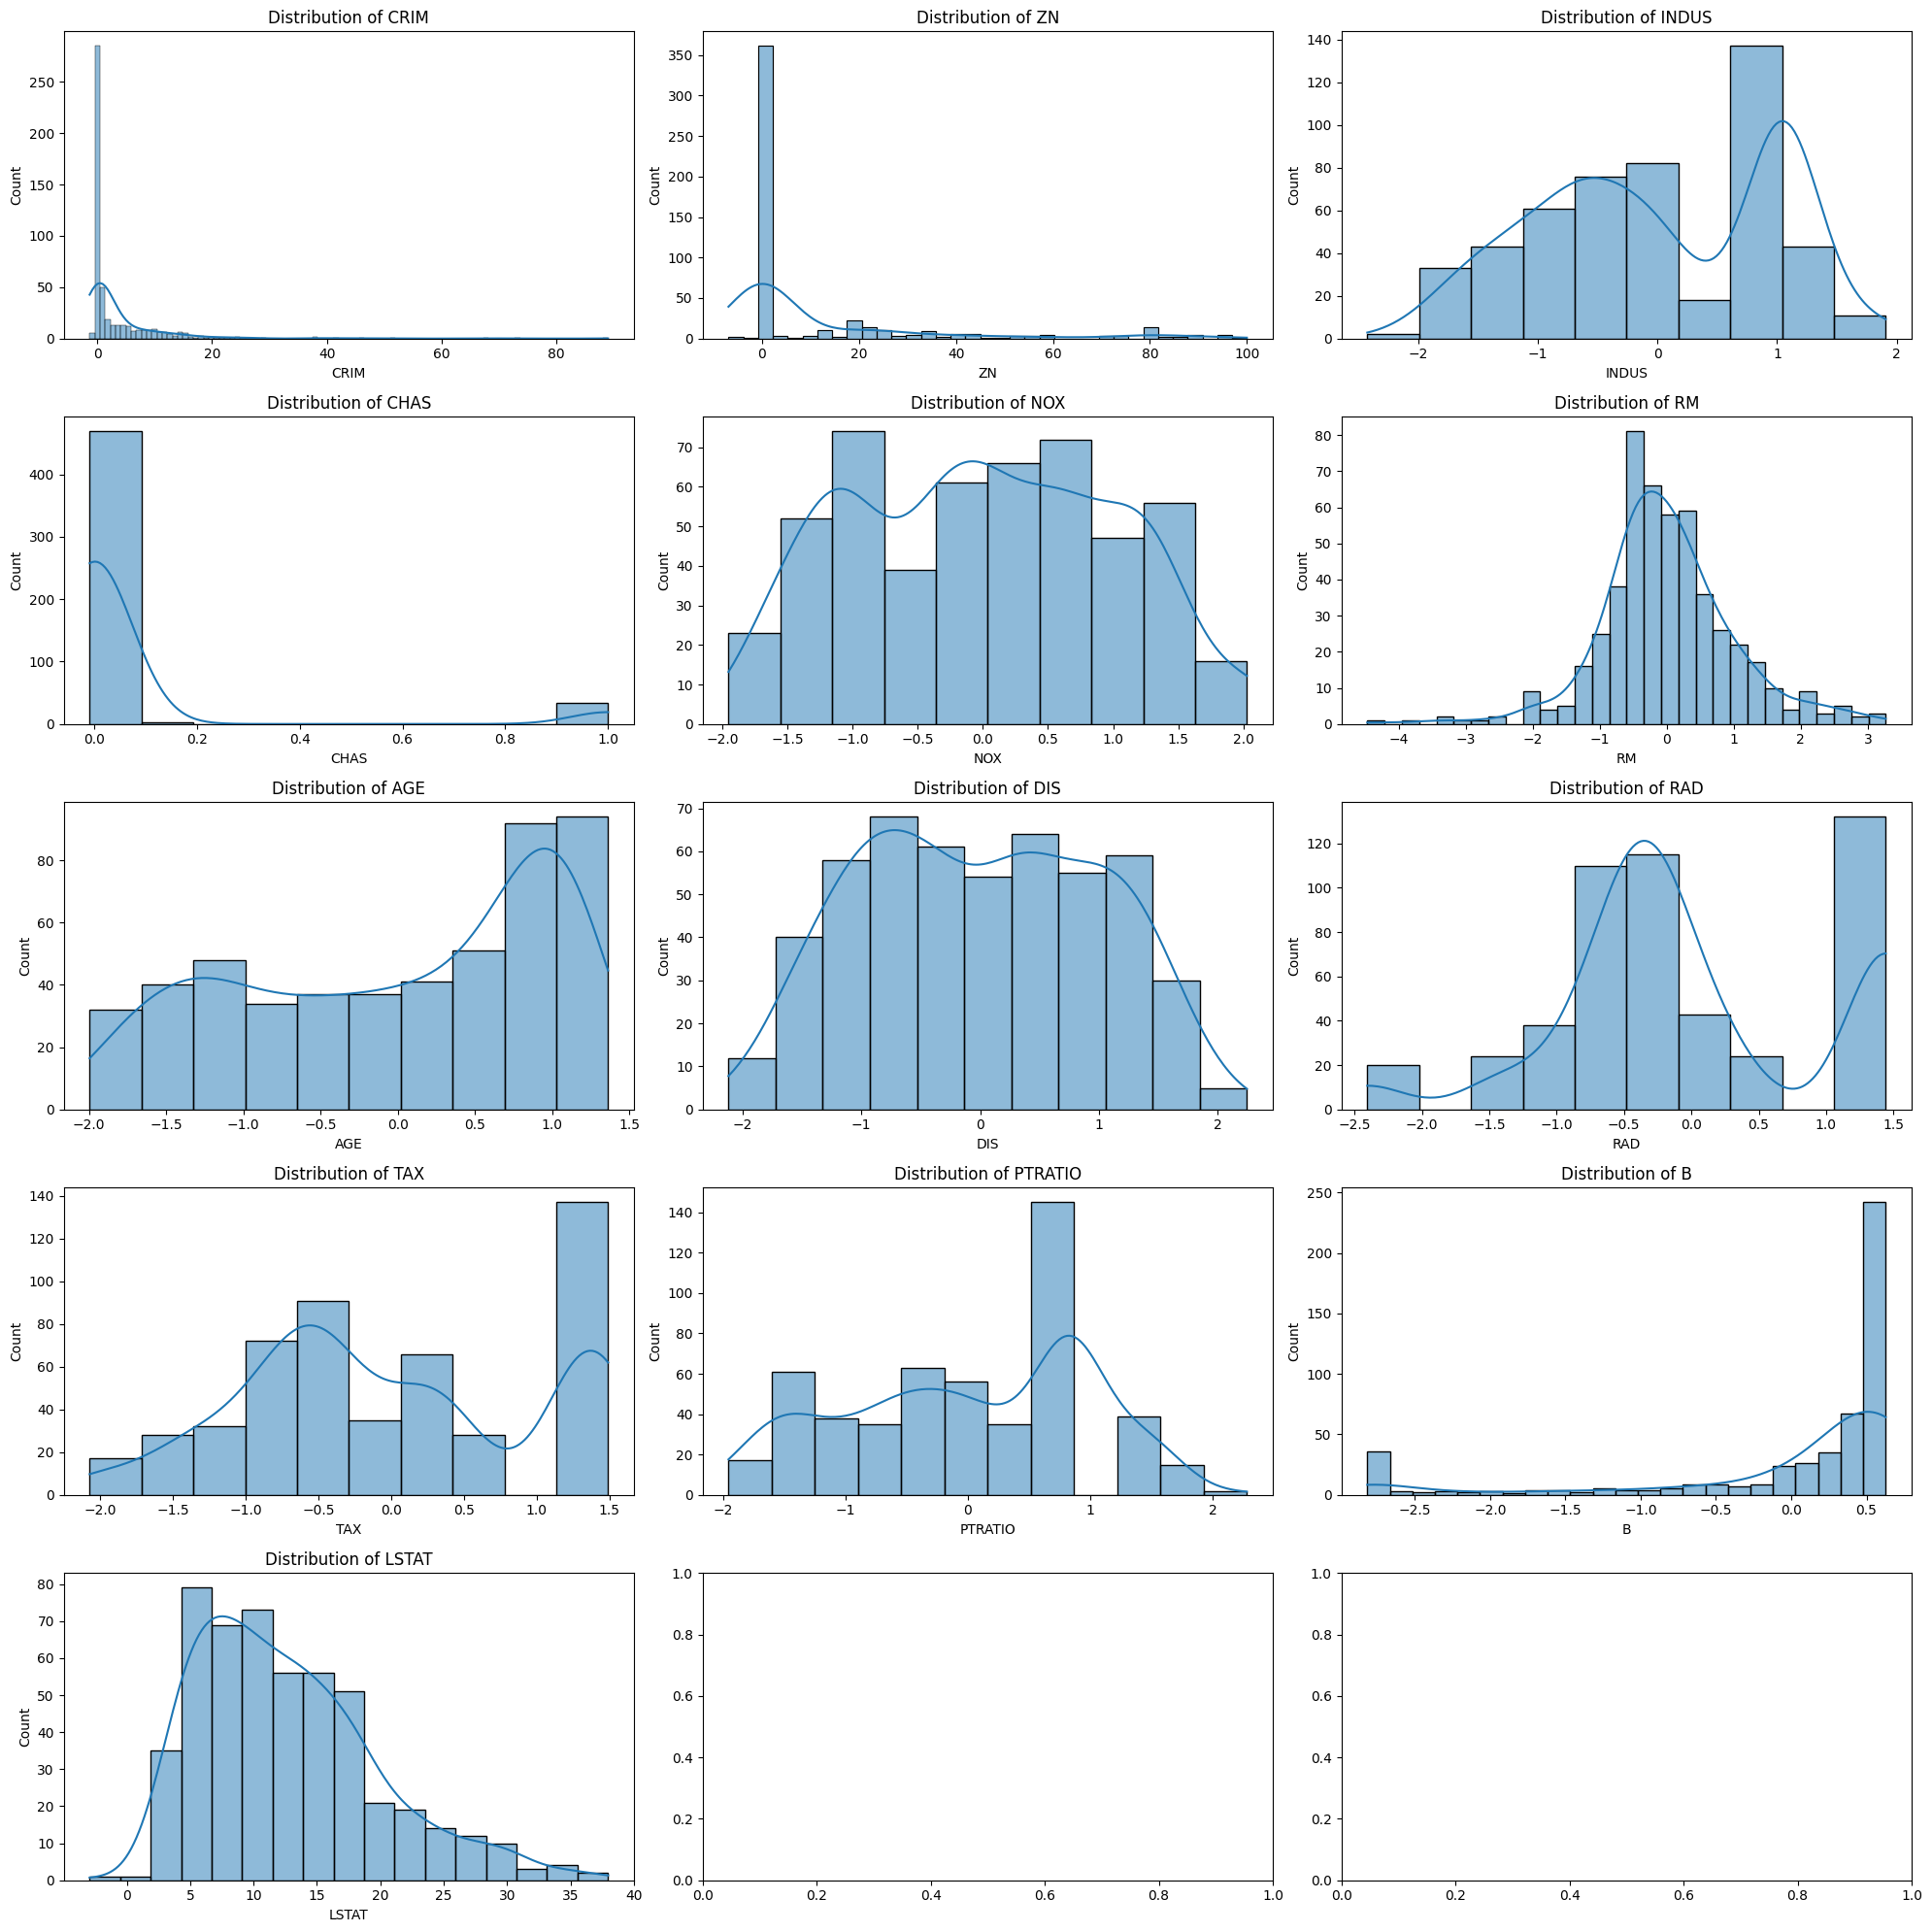

In [19]:
plot_distribution(X_boxcox, X_boxcox.columns.tolist())

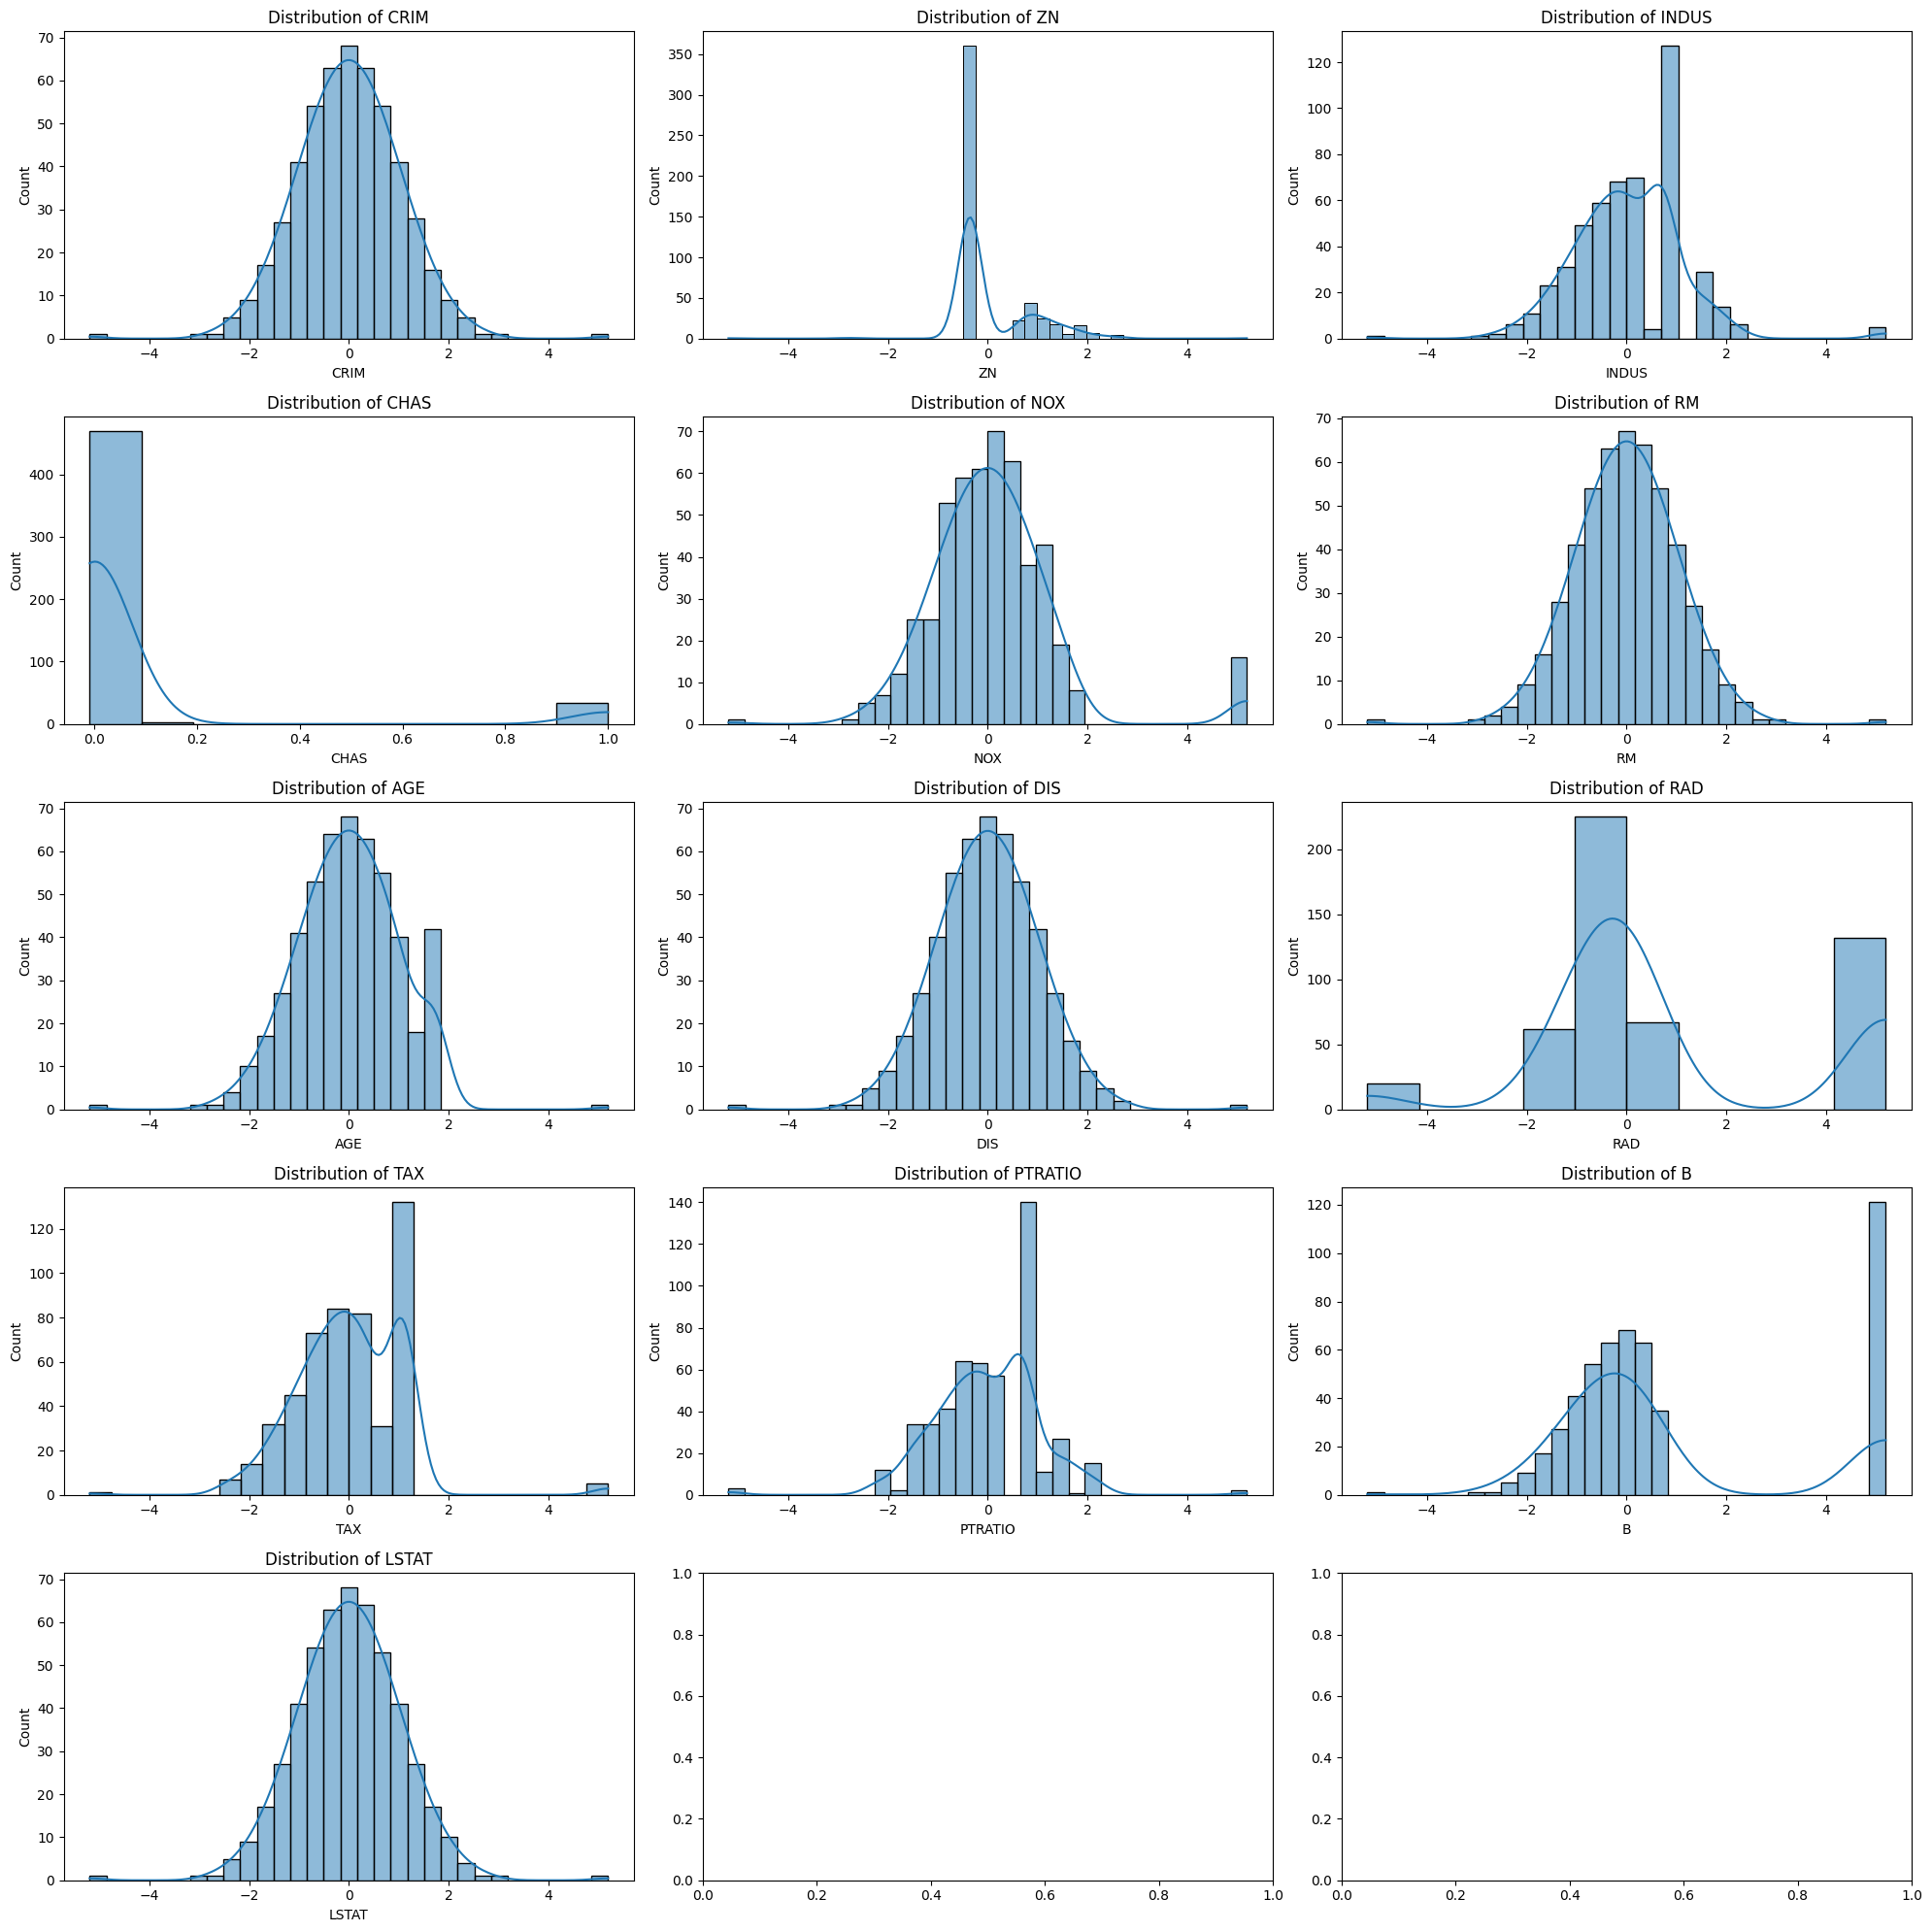

In [20]:
plot_distribution(X_quantitle, X_quantitle.columns.tolist())

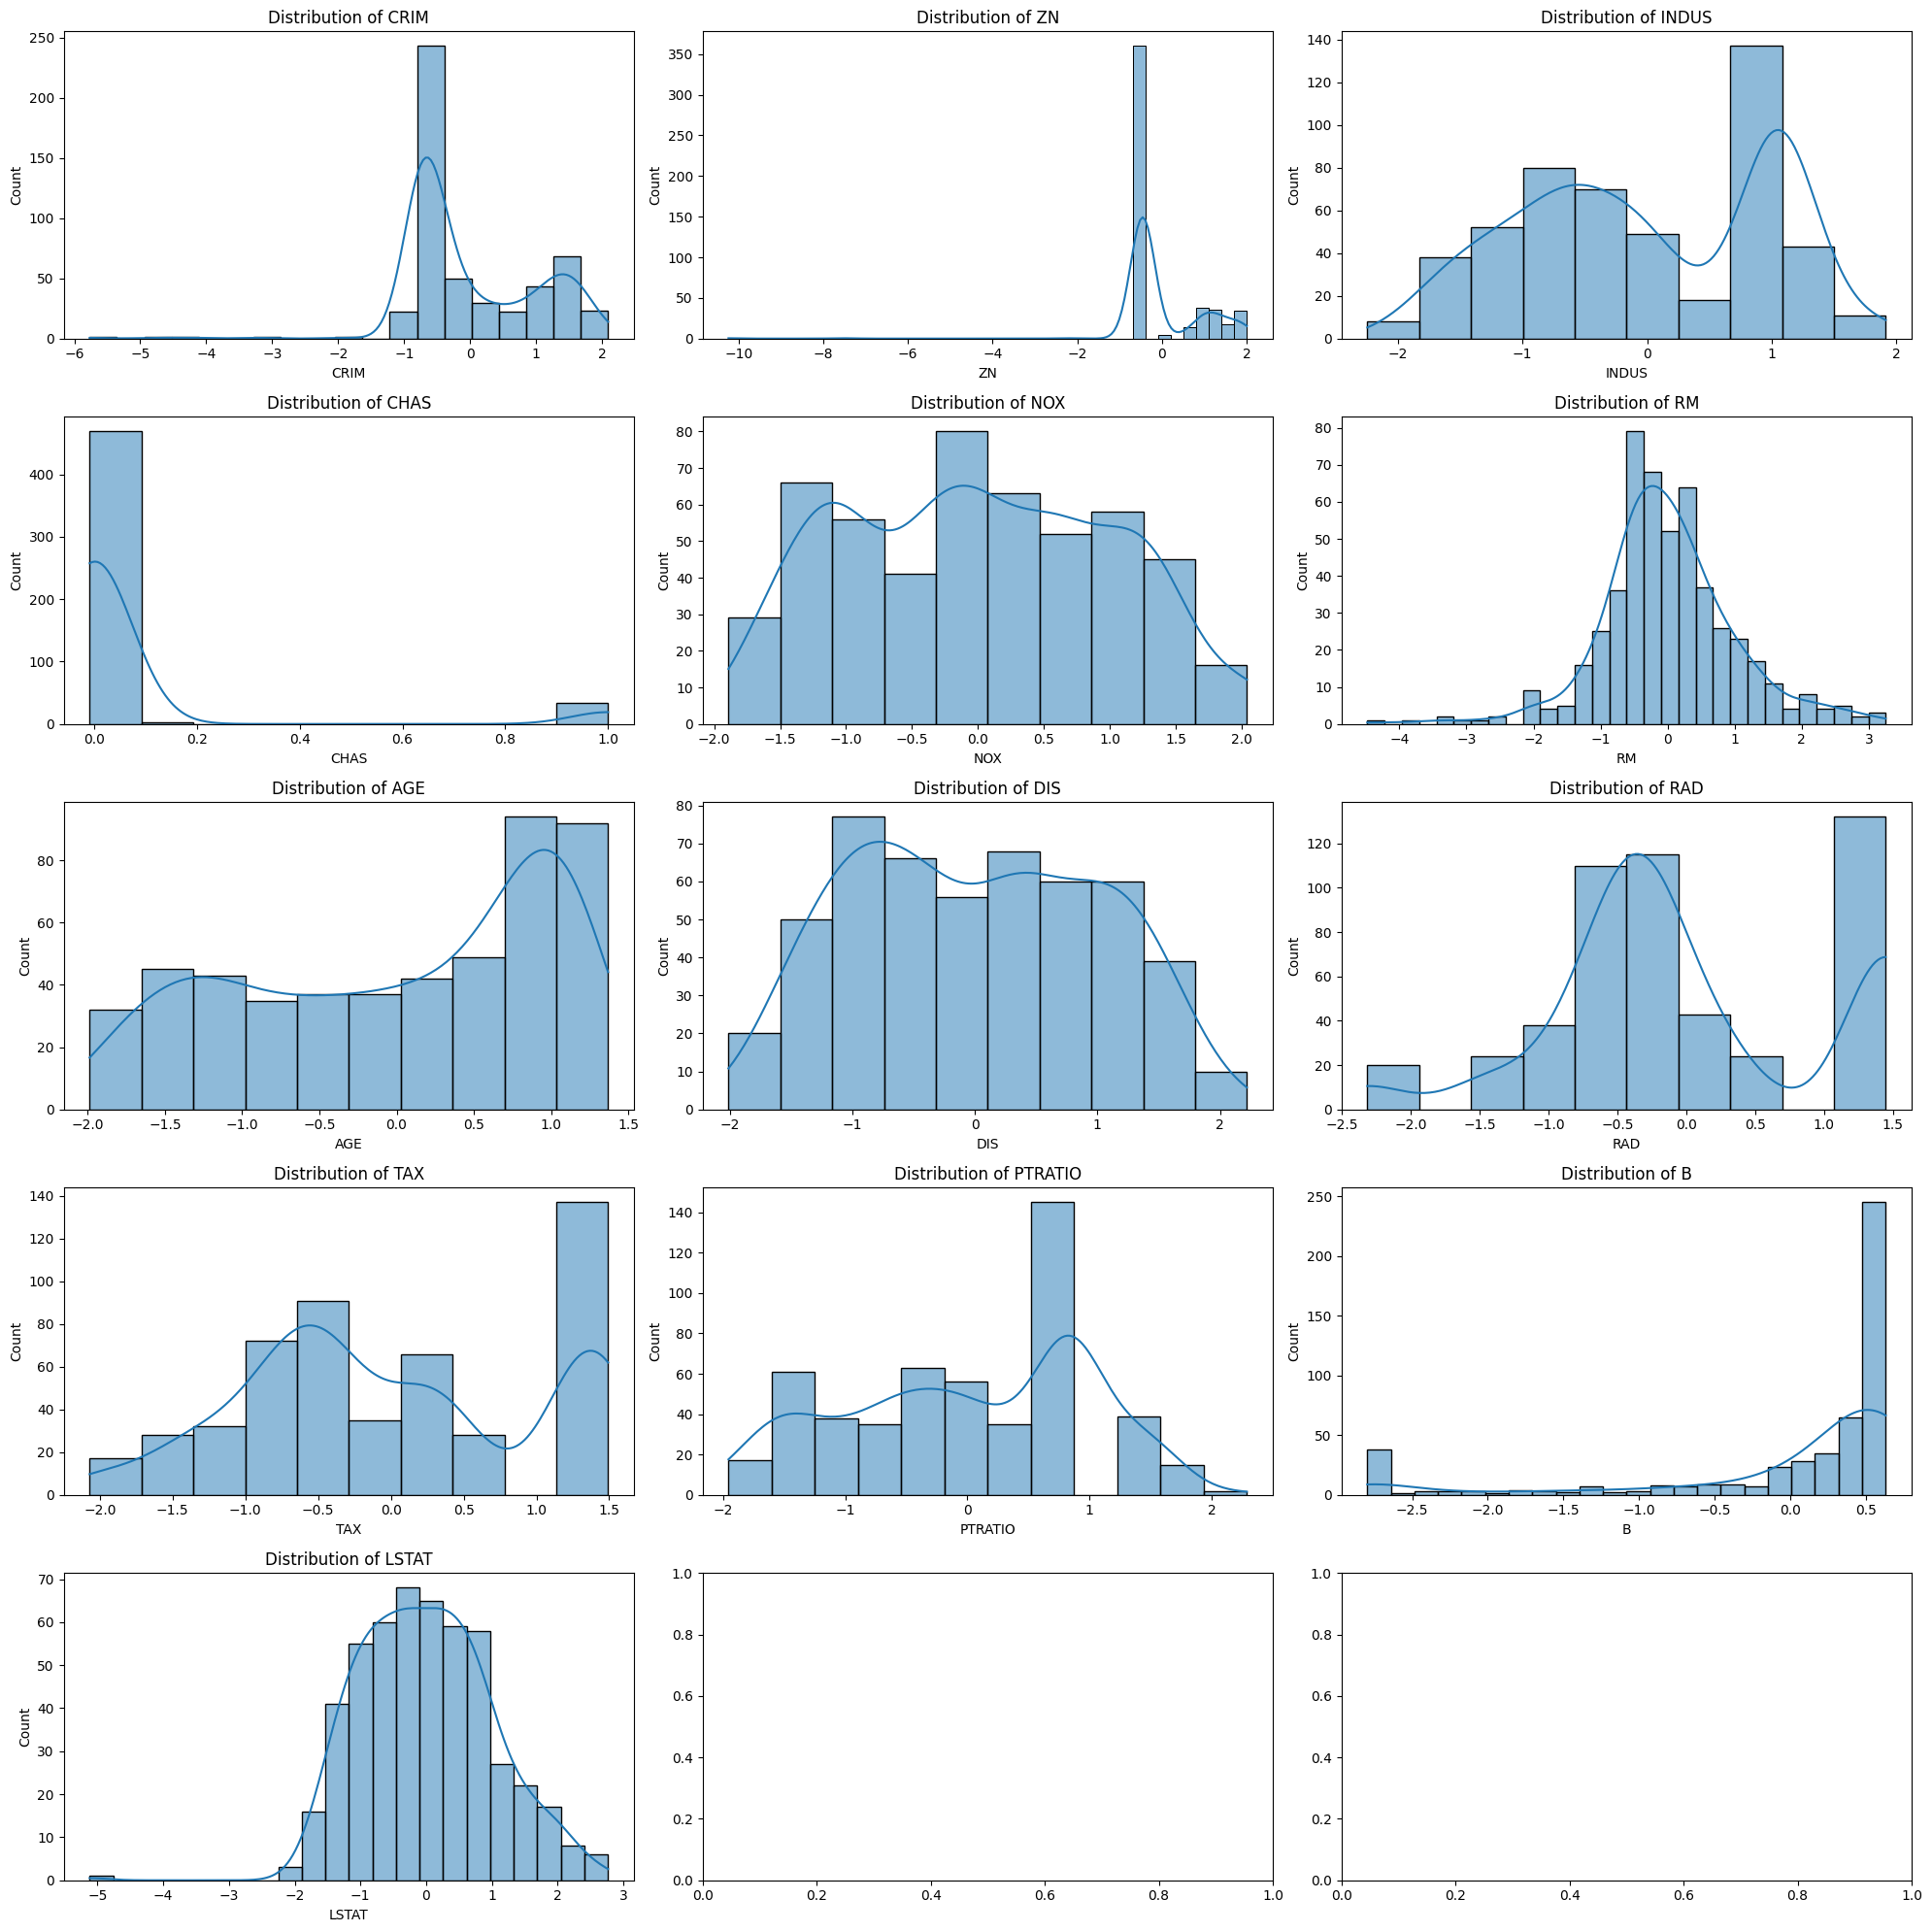

In [21]:
plot_distribution(X_yeojohnson, X_yeojohnson.columns.tolist())

In [22]:
#feature selection
from xgboost import XGBRegressor
from sklearn.feature_selection import SelectFromModel
#가장 정규분포를 띄는 Quantiltle 변환 분포 사용
X = X_quantitle
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#모델설정 및 초기화화
model = XGBRegressor(random_state=42, n_estimators=100, learning_rate=0.1)
#모델 학습
model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [23]:
# Feature Importance 확인
importances = model.feature_importances_
for feature, importance in zip(X.columns, importances):
    print(f"{feature}: {importance}")

CRIM: 0.030383650213479996
ZN: 0.003434784710407257
INDUS: 0.007235242519527674
CHAS: 0.01166554819792509
NOX: 0.03405814990401268
RM: 0.3768739700317383
AGE: 0.009488754905760288
DIS: 0.06386429071426392
RAD: 0.01646718569099903
TAX: 0.03265644982457161
PTRATIO: 0.042186297476291656
B: 0.013251440599560738
LSTAT: 0.3584342300891876


In [24]:
g# 중요도 기준으로 특성 선택(평균균)
selector = SelectFromModel(model, prefit=True, threshold=0.03) 
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

d:\DT\Python_DL_study_project\DL_project\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
d:\DT\Python_DL_study_project\DL_project\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [25]:
print(f"원본 피쳐개수: {X_train.shape[1]}")
print(f"선택피쳐개수: {X_train_selected.shape[1]}")

원본 피쳐개수: 13
선택피쳐개수: 7


In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
# 선택된 특성으로 교차 검증
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)  # 음수로 반환해 스코어 형식에 맞춤
model_selected = XGBRegressor(random_state=42, n_estimators=100, learning_rate=0.1)
cv_scores = cross_val_score(model_selected, X_train_selected, y_train, cv=5, scoring=mse_scorer)

In [27]:
# 교차 검증 결과 출력
print("cv_score:", -cv_scores)  # 음수를 원래 값으로 변환
print("Mean MSE from CV:", -np.mean(cv_scores))

cv_score: [12.09391835 19.71807593 10.42919701 11.28780588 12.68970232]
Mean MSE from CV: 13.24373989767212


In [28]:
# 선택된 특성으로 모델 재학습 및 평가
model_selected = XGBRegressor(random_state=42, n_estimators=100, learning_rate=0.1)
model_selected.fit(X_train_selected, y_train)
y_pred = model_selected.predict(X_test_selected)

In [29]:
# 성능 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("mse:", mse)
print("r2_score", r2)

mse: 6.074083499945694
r2_score 0.9171720967038277


In [30]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}
scorer = make_scorer(mean_squared_error, greater_is_better=False)  # MSE를 음수로 반환

grid_search = GridSearchCV(
    estimator=XGBRegressor(random_state=42),
    param_grid=param_grid,
    scoring=scorer,
    cv=5,
    n_jobs=-1,
    verbose=1
)

In [31]:
# GridSearchCV 실행
grid_search.fit(X_train_selected, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 200],
                         'subsample': [0.8, 1.0]},
             scoring=make_scorer(mean_squared_error, greater_is_better=False),
             verbose=1)

In [32]:
# 최적의 파라미터와 점수 출력
print("최적파라미터터:", grid_search.best_params_)
print("최적파라미터스코어:", grid_search.best_score_)

최적파라미터터: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1.0}
최적파라미터스코어: -12.06666874605674


In [33]:
# 최적의 파라미터로 모델 재학습
best_model = grid_search.best_estimator_
best_model.fit(X_train_selected, y_train)
y_pred = best_model.predict(X_test_selected)

In [35]:
# 최종 성능 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("최종 mse:", mse)
print("r2_score", r2)


최종 mse: 5.89967849491321
r2_score 0.9195503321843457


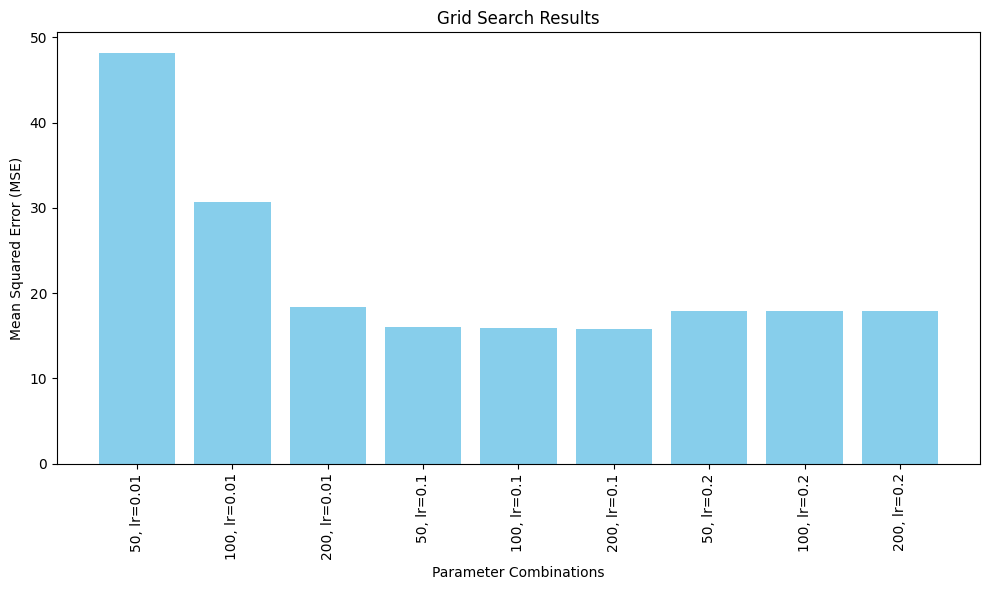

In [36]:
# GridSearchCV 결과 시각화
results = pd.DataFrame(grid_search.cv_results_)
mean_scores = -results['mean_test_score']  # 음수 MSE를 양수로 변환
params = results['param_n_estimators'].astype(str) + ", lr=" + results['param_learning_rate'].astype(str)

plt.figure(figsize=(10, 6))
plt.bar(params, mean_scores, color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Parameter Combinations')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Grid Search Results')
plt.tight_layout()
plt.show()


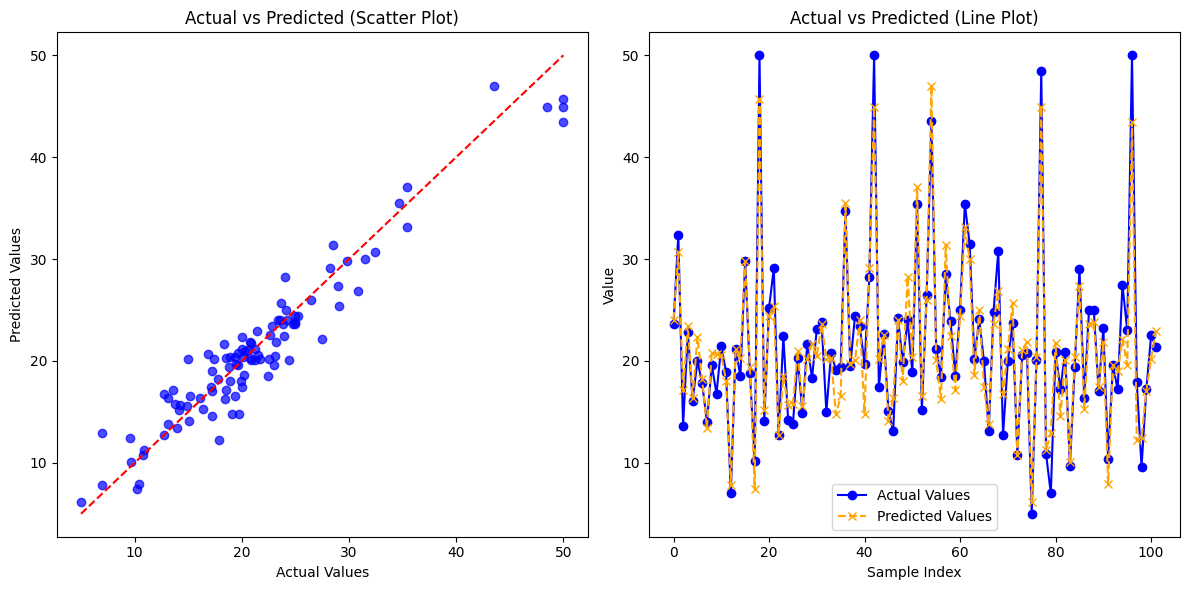

In [37]:
# 실제값과 예측값 시각화
plt.figure(figsize=(12, 6))

# 1. 산점도
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # 완벽히 일치하는 선
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted (Scatter Plot)")

# 2. 선 그래프
plt.subplot(1, 2, 2)
plt.plot(y_test.values, label="Actual Values", marker='o', linestyle='-', color='blue')
plt.plot(y_pred, label="Predicted Values", marker='x', linestyle='--', color='orange')
plt.legend()
plt.xlabel("Sample Index")
plt.ylabel("Value")
plt.title("Actual vs Predicted (Line Plot)")

plt.tight_layout()
plt.show()